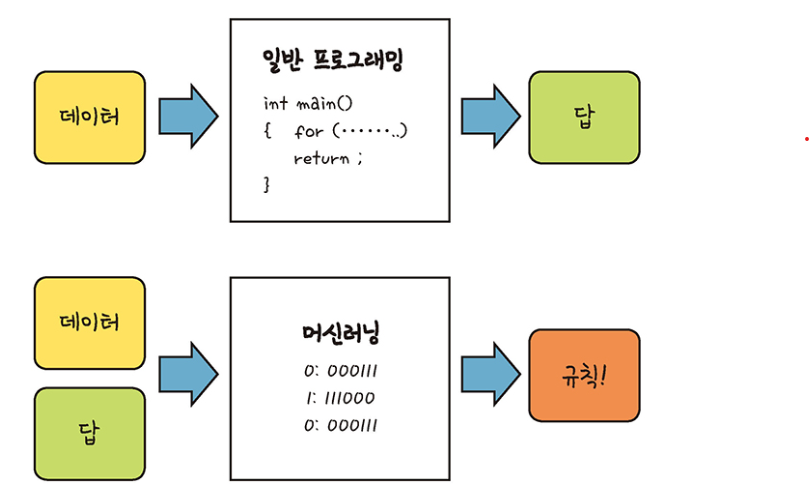

In [108]:
from IPython.display import Image
Image('images/comparing_f_dl.png')

일반적인 프로그래밍은 위의 그림이 같이, 데이터가 있다면 내부 프로그래밍을 통해 return 값을 정해주는 방식 <br>
하지만, 머신러닝 딥러닝의 경우 데이터와 답 데이터를 넣었울 경우 머신이 학습하며 예측한 답과 실제 답을 비교해보며 그 패턴을 분석해 나가는 방식

흔히, XOR 문제에서 머신러닝의 개념이 시작되었다.

## Machine Learning 의 종류

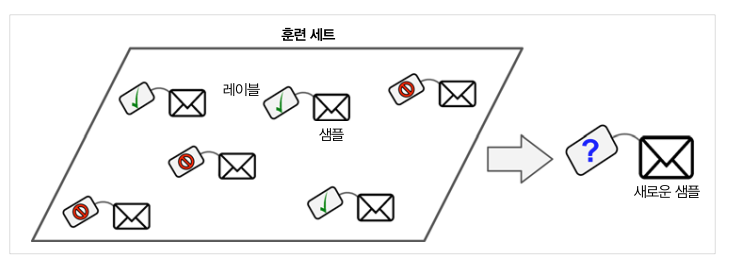

In [114]:
# 지도학습 (Supervised Learning)
Image('images/sl.png')

# image, label
# 종류 
# K-nearest neighbors
# Linear regression 
# Logistic regression 
# Support vector machine
# Decision tree, Random forest
# Neural network 

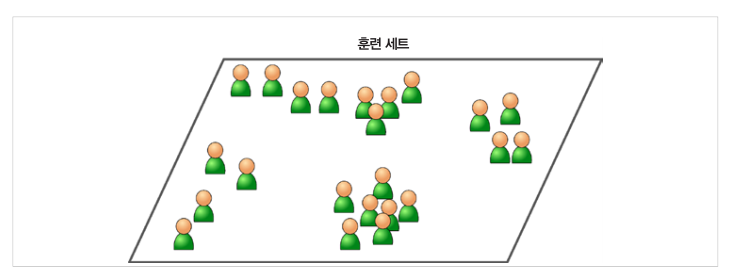

In [115]:
# 비지도학습 (Unsupervised Learning)
Image('images/usl.png')

# image 

# 종류 
# clustering
# visualization & Dimensionality reduction
# Association rule learning

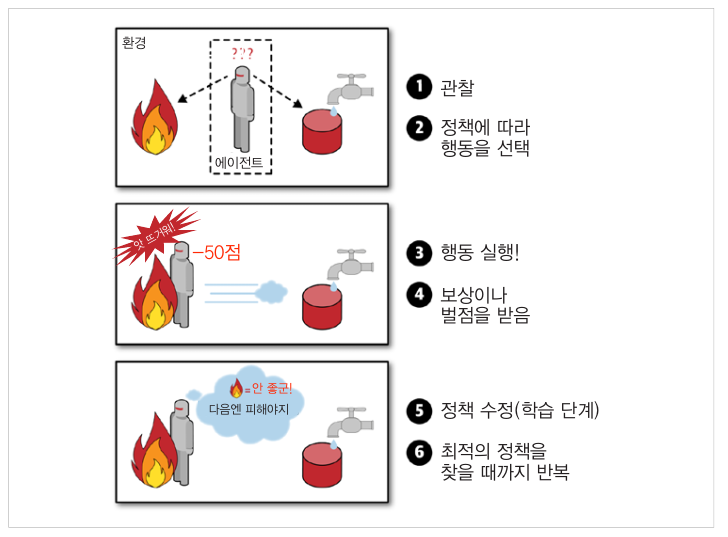

In [116]:
# 강화학습 (Reinforcement Learning)
Image('images/reinforce.png')

# 예시 
# 알파고

# Machine Learning & Deep Learning 차이

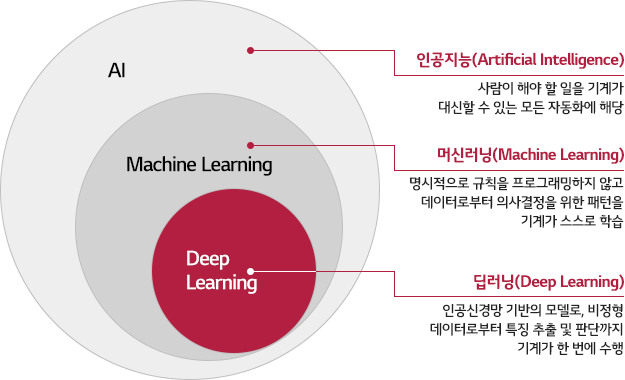

In [117]:
Image('images/diff.png')


# 머신러닝 : 개발자 혹은 연구자가 개입
# 딥러닝 : 신경망을 통해 기계가 판단 할 수 있도록 처리

# TensorFlow / Keras

TensorFlow와 Keras는 ML 모델을 개발하고 학습시키는 데 도움이 되는 핵심 오픈소스 라이브러리입니다.

TensorFlow와 Keras는 모두 2015년에 릴리즈 되었습니다 (Keras는 2015년 3월, TensorFlow는 2015년 11월). 이는 딥러닝 세계의 관점에서 볼 때, 꽤 오랜시간이라고 볼 수 있습니다.

Keras는 사용자가 TensorFlow를 좀 더 쉽고 편하게 사용할 수 있게 해주는 high level API를 제공합니다.

TensorFlow 2.x에서는 Keras를 딥러닝의 공식 API로 채택하였고, Keras는 TensorFlow 내의 하나의 framwork으로 개발되고 있습니다.

## TensorFlow / Keras Basic

### TensorFlow / Keras import

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
print(tf.__version__)
print(keras.__version__)

2.6.0
2.6.0


### TensorFlow / Keras 맛보기

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# MNIST dataset download
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [9]:
# Model 생성, compile
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Training / Evaluation
model.fit(x_train, y_train, epochs=10)

model.evaluate(x_test,  y_test)

Epoch 1/10
1875/1875 [==============================] - 2s 799us/step - loss: 0.2881 - accuracy: 0.9165
Epoch 2/10
1875/1875 [==============================] - 1s 748us/step - loss: 0.1390 - accuracy: 0.9589
Epoch 3/10
1875/1875 [==============================] - 1s 744us/step - loss: 0.1036 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 1s 728us/step - loss: 0.0884 - accuracy: 0.9726
Epoch 5/10
1875/1875 [==============================] - 1s 707us/step - loss: 0.0754 - accuracy: 0.9759
Epoch 6/10
1875/1875 [==============================] - 1s 754us/step - loss: 0.0668 - accuracy: 0.9790
Epoch 7/10
1875/1875 [==============================] - 1s 783us/step - loss: 0.0588 - accuracy: 0.9811
Epoch 8/10
1875/1875 [==============================] - 1s 796us/step - loss: 0.0513 - accuracy: 0.9832
Epoch 9/10
1875/1875 [==============================] - 1s 754us/step - loss: 0.0490 - accuracy: 0.9838
Epoch 10/10
313/313 [==============================] - 0s 607us/

[0.07259900867938995, 0.9797000288963318]

데이터를 탐색해봅시다:

In [11]:
idx = np.random.randint(len(x_train))
image = x_train[idx]

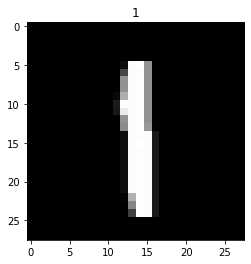

In [12]:
plt.imshow(image, cmap='gray')
plt.title(y_train[idx])
plt.show()

### Tensor

Tensor는 multi-dimensional array를 나타내는 말로, TensorFlow의 기본 data type입니다

In [13]:
# Hello World
hello = tf.constant([3,3], dtype=tf.float32)
print(hello)

tf.Tensor([3. 3.], shape=(2,), dtype=float32)


In [14]:
# 상수형 tensor는 아래와 같이 만들 수 있습니다
# 출력해보면 tensor의 값과 함께, shape과 내부의 data type을 함께 볼 수 있습니다
x = tf.constant([[1.0, 2.0],
                 [3.0, 4.0]])
print(x)
print(type(x))

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [15]:
# 아래와 같이 numpy ndarray나 python의 list도 tensor로 바꿀 수 있습니다
x_np = np.array([[1.0, 2.0],
                [3.0, 4.0]])
x_list = [[1.0, 2.0], 
         [3.0, 4.0]]

print(type(x_np))
print(type(x_list))

<class 'numpy.ndarray'>
<class 'list'>


In [16]:
x_np = tf.convert_to_tensor(x_np)
x_list = tf.convert_to_tensor(x_list)

print(type(x_np))
print(type(x_list))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [17]:
# 반대로 tensor를 다음과 같이 numpy ndarray로 바꿀 수도 있습니다
x.numpy()

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [18]:
print(type(x.numpy()))

<class 'numpy.ndarray'>


In [19]:
a = tf.ones((2,3))
b = tf.zeros((2,3))
c = tf.fill((2,2), 2)
print(a)
print(b)
print(c)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[2 2]
 [2 2]], shape=(2, 2), dtype=int32)


In [20]:
d = tf.zeros_like(c)
e = tf.ones_like(c)
print(d)
print(e)

tf.Tensor(
[[0 0]
 [0 0]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1 1]
 [1 1]], shape=(2, 2), dtype=int32)


In [21]:
f = tf.eye(3)
print(f)

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [22]:
g  = tf.range(10)
print(g)

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)


In [23]:
h = tf.random.uniform((2,2)) # np.rand
i = tf.random.normal((2,2))  # np.randn
print(h)
print(i)

tf.Tensor(
[[0.27888918 0.06627464]
 [0.13819432 0.21952295]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-0.7516828   0.82091975]
 [ 0.22613326  0.18866287]], shape=(2, 2), dtype=float32)


#### Tensor의 속성

In [24]:
tensor = tf.random.normal((3,4))

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")

Shape of tensor: (3, 4)
Datatype of tensor: <dtype: 'float32'>


In [25]:
# 속성 변경
tensor = tf.reshape(tensor, (4, 3))
tensor = tf.cast(tensor, tf.int32)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")

Shape of tensor: (4, 3)
Datatype of tensor: <dtype: 'int32'>


### Indexing과 Slicing

In [32]:
a = tf.range(1, 13)
a = tf.reshape(a, (3, 4))
print(a)

tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(3, 4), dtype=int32)


In [33]:
# indexing
print(a[1])
print(a[0,-1])

tf.Tensor([5 6 7 8], shape=(4,), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [34]:
# slicing
print(a[1:-1])
print(a[:2, 2:])

tf.Tensor([[5 6 7 8]], shape=(1, 4), dtype=int32)
tf.Tensor(
[[3 4]
 [7 8]], shape=(2, 2), dtype=int32)


### Transpose

In [35]:
a = tf.range(16)
a = tf.reshape(a, (2, 2, -1))
print(a)

tf.Tensor(
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]], shape=(2, 2, 4), dtype=int32)


In [36]:
b = tf.transpose(a, (2, 0, 1))
print(b)

tf.Tensor(
[[[ 0  4]
  [ 8 12]]

 [[ 1  5]
  [ 9 13]]

 [[ 2  6]
  [10 14]]

 [[ 3  7]
  [11 15]]], shape=(4, 2, 2), dtype=int32)


### Tensor 연산

In [37]:
x = tf.constant([[1,2], [3,4]], dtype=tf.float32)
y = tf.constant([[5,6], [7,8]], dtype=tf.float32)
print(x)
print(y)

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[5. 6.]
 [7. 8.]], shape=(2, 2), dtype=float32)


In [38]:
print(x + y)
print(x - y)
print(x * y)
print(x / y)
print(x @ y)
print('='*30)
print(tf.add(x, y))
print(tf.subtract(x, y))
print(tf.multiply(x, y))
print(tf.divide(x, y))
print(tf.matmul(x, y))

tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-4. -4.]
 [-4. -4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 5. 12.]
 [21. 32.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.2        0.33333334]
 [0.42857143 0.5       ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-4. -4.]
 [-4. -4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 5. 12.]
 [21. 32.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.2        0.33333334]
 [0.42857143 0.5       ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)


In [39]:
z = tf.range(1, 11)
z = tf.reshape(z, (2, 5))
print(z)

tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]], shape=(2, 5), dtype=int32)


In [40]:
print(tf.reduce_sum(z))

tf.Tensor(55, shape=(), dtype=int32)


In [41]:
sum1 = tf.reduce_sum(z, axis=0)
sum2 = tf.reduce_sum(z, axis=1)
sum3 = tf.reduce_sum(z, axis=-1)
print(sum1)
print(sum2)
print(sum3)

tf.Tensor([ 7  9 11 13 15], shape=(5,), dtype=int32)
tf.Tensor([15 40], shape=(2,), dtype=int32)
tf.Tensor([15 40], shape=(2,), dtype=int32)


In [42]:
concat = tf.concat([z, z], axis=0)
print(concat)

tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [ 1  2  3  4  5]
 [ 6  7  8  9 10]], shape=(4, 5), dtype=int32)


In [43]:
concat = tf.concat([z, z], axis=-1)
print(concat)

tf.Tensor(
[[ 1  2  3  4  5  1  2  3  4  5]
 [ 6  7  8  9 10  6  7  8  9 10]], shape=(2, 10), dtype=int32)


In [44]:
stack = tf.stack([z, z], axis=0)
print(stack)

tf.Tensor(
[[[ 1  2  3  4  5]
  [ 6  7  8  9 10]]

 [[ 1  2  3  4  5]
  [ 6  7  8  9 10]]], shape=(2, 2, 5), dtype=int32)


In [45]:
stack = tf.stack([z, z], axis=-1)
print(stack)

tf.Tensor(
[[[ 1  1]
  [ 2  2]
  [ 3  3]
  [ 4  4]
  [ 5  5]]

 [[ 6  6]
  [ 7  7]
  [ 8  8]
  [ 9  9]
  [10 10]]], shape=(2, 5, 2), dtype=int32)


In [46]:
stack = tf.stack([z, z], axis=1)
print(stack)

tf.Tensor(
[[[ 1  2  3  4  5]
  [ 1  2  3  4  5]]

 [[ 6  7  8  9 10]
  [ 6  7  8  9 10]]], shape=(2, 2, 5), dtype=int32)


## Dataset

Data를 처리하여 model에 공급하기 위하여 TensorFlow에서는 tf.data.Dataset을 사용합니다.

### FashoinMNIST data 불러오기

In [47]:
mnist = keras.datasets.fashion_mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [48]:
# train_images, train_labels의 shape 확인
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [49]:
# test_images, test_labels의 shape 확인
print(test_images.shape, test_labels.shape)

(10000, 28, 28) (10000,)


In [50]:
type(train_images)

numpy.ndarray

In [51]:
# training set의 각 class 별 image 수 확인
unique, counts = np.unique(train_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [52]:
# test set의 각 class 별 image 수 확인
unique, counts = np.unique(test_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

### Data 시각화하기

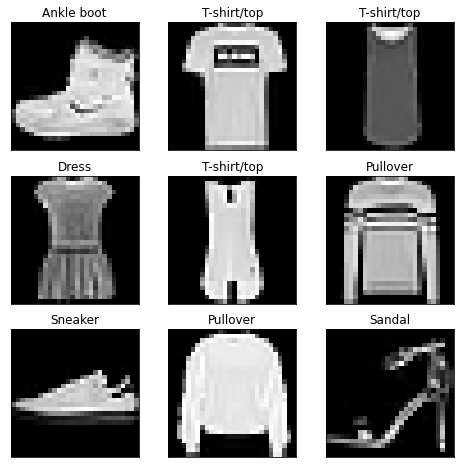

In [53]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
plt.show()

### Data 전처리

In [54]:
# image를 0~1사이 값으로 만들기 위하여 255로 나누어줌
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

# one-hot encoding
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

### Dataset 만들기

In [55]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(64)

Feature batch shape: (64, 28, 28)
Labels batch shape: (64, 10)


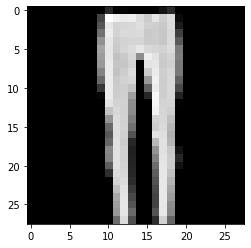

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [56]:
# Dataset을 통해 반복하기(iterate)
# 이미지와 정답(label)을 표시합니다.
imgs, lbs = next(iter(train_dataset))
print(f"Feature batch shape: {imgs.shape}")
print(f"Labels batch shape: {lbs.shape}")

img = imgs[0]
lb = lbs[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f"Label: {lb}")

### Custom Dataset 만들기

In [57]:
a = np.arange(10)
print(a)

ds_tensors = tf.data.Dataset.from_tensor_slices(a)
print(ds_tensors)

for x in ds_tensors:
    print (x)

[0 1 2 3 4 5 6 7 8 9]
<TensorSliceDataset shapes: (), types: tf.int32>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [58]:
# data 전처리(변환), shuffle, batch 추가
ds_tensors = ds_tensors.map(tf.square).shuffle(10).batch(2)

In [59]:
for _ in range(3):
    for x in ds_tensors:
        print(x)
    print('='*50)

tf.Tensor([25 64], shape=(2,), dtype=int32)
tf.Tensor([0 1], shape=(2,), dtype=int32)
tf.Tensor([36 81], shape=(2,), dtype=int32)
tf.Tensor([ 9 49], shape=(2,), dtype=int32)
tf.Tensor([ 4 16], shape=(2,), dtype=int32)
tf.Tensor([49 25], shape=(2,), dtype=int32)
tf.Tensor([36  4], shape=(2,), dtype=int32)
tf.Tensor([1 9], shape=(2,), dtype=int32)
tf.Tensor([81 64], shape=(2,), dtype=int32)
tf.Tensor([16  0], shape=(2,), dtype=int32)
tf.Tensor([36 49], shape=(2,), dtype=int32)
tf.Tensor([1 4], shape=(2,), dtype=int32)
tf.Tensor([ 0 25], shape=(2,), dtype=int32)
tf.Tensor([64 16], shape=(2,), dtype=int32)
tf.Tensor([ 9 81], shape=(2,), dtype=int32)


## Model

### Keras Sequential API 사용


In [64]:
def create_seq_model():
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [65]:
seq_model = create_seq_model()

In [66]:
seq_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Keras Functional API 사용

In [67]:
def create_func_model():
  inputs = keras.Input(shape=(28,28))
  flatten = keras.layers.Flatten()(inputs)
  dense = keras.layers.Dense(128, activation='relu')(flatten)
  drop = keras.layers.Dropout(0.2)(dense)
  outputs = keras.layers.Dense(10, activation='softmax')(drop)
  model = keras.Model(inputs=inputs, outputs=outputs)
  return model

In [68]:
func_model = create_func_model()

In [69]:
func_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Model Class Subclassing 사용

In [70]:
class SubClassModel(keras.Model):
  def __init__(self):
    super(SubClassModel, self).__init__()
    self.flatten = keras.layers.Flatten(input_shape=(28, 28))
    self.dense1 = keras.layers.Dense(128, activation='relu')
    self.drop = keras.layers.Dropout(0.2)
    self.dense2 = keras.layers.Dense(10, activation='softmax')
  def call(self, x, training=False):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.drop(x)
    return self.dense2(x)

In [71]:
subclass_model = SubClassModel()

In [72]:
inputs = tf.zeros((1, 28, 28))
subclass_model(inputs)
subclass_model.summary()

Model: "sub_class_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          multiple                  0         
_________________________________________________________________
dense_8 (Dense)              multiple                  100480    
_________________________________________________________________
dropout_4 (Dropout)          multiple                  0         
_________________________________________________________________
dense_9 (Dense)              multiple                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Loss

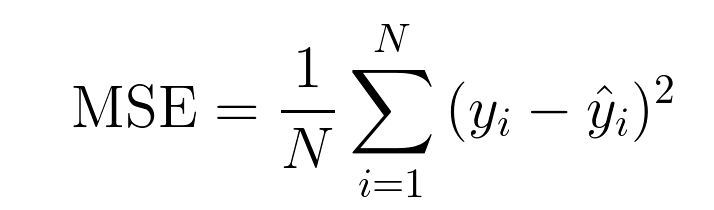

In [109]:
# MSE (Mean Squared Error)
Image('images/mse.png')

# 예측한 값과 실제 값 사이의 평균 제곱 오차를 정의한다. 
# 차가 커질수록 제곱 연산으로 인해서 값이 더욱 뚜렷
# 그리고 제곱으로 인해서 오차가 양수이든 음수이든 누적 값을 증가
tf.keras.losses.mse() 

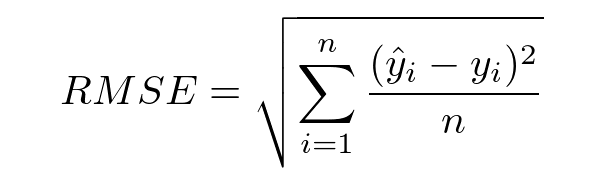

In [110]:
Image('images/rmse.png')


# MSE에 루트(√)를 씌운 것으로 MSE와 기본적으로 동일
# MSE 값은 오류의 제곱을 구하기 때문에 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 은 값의 왜곡을 줄여줌
tf.keras.losses.rmse()

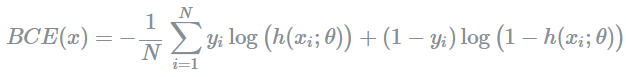

In [113]:
Image('images/crossentropy.png')

# 교차 엔트로피를 이용한 주로 이진분류 (0, 1) 을 분류 할 때 많이 쓰는 함수
tf.keras.losses.CrossEntropy()

# 교차 엔트로피를 이용한 주로 다중분류 을 분류 할 때 많이 쓰는 함수
tf.keras.losses.CrossEntropy()

## Traning / Validation

### Keras API 사용

In [74]:
learning_rate = 0.001
seq_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
history = seq_model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.5578 - accuracy: 0.8031 - val_loss: 0.4665 - val_accuracy: 0.8285
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.4118 - accuracy: 0.8530 - val_loss: 0.4002 - val_accuracy: 0.8557
Epoch 3/10
938/938 [==============================] - 1s 2ms/step - loss: 0.3731 - accuracy: 0.8642 - val_loss: 0.3760 - val_accuracy: 0.8668
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3498 - accuracy: 0.8739 - val_loss: 0.3754 - val_accuracy: 0.8695
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3314 - accuracy: 0.8785 - val_loss: 0.3486 - val_accuracy: 0.8733
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3197 - accuracy: 0.8837 - val_loss: 0.3635 - val_accuracy: 0.8690
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3094 - accuracy: 0.8859 - val_loss: 0.3397 - val_accuracy: 0.8784
Epoch 

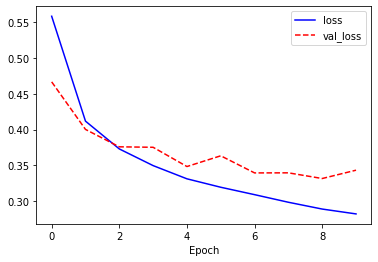

In [76]:
## Plot losses
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

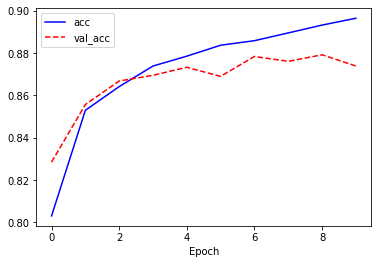

In [77]:
## Plot Accuracy
plt.plot(history.history['accuracy'], 'b-', label='acc')
plt.plot(history.history['val_accuracy'], 'r--', label='val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### GradientTape 사용

In [78]:
# loss function
loss_object = keras.losses.CategoricalCrossentropy()

In [79]:
# optimizer
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

In [80]:
# loss, accuracy 계산
train_loss = keras.metrics.Mean(name='train_loss')
train_accuracy = keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = keras.metrics.Mean(name='test_loss')
test_accuracy = keras.metrics.CategoricalAccuracy(name='test_accuracy')

In [81]:
@tf.function
def train_step(model, images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [82]:
@tf.function
def test_step(model, images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [83]:
EPOCHS = 10

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_dataset:
    train_step(func_model, images, labels)

  for test_images, test_labels in test_dataset:
    test_step(func_model, test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

Epoch 1, Loss: 0.5568942427635193, Accuracy: 80.43500518798828, Test Loss: 0.44488006830215454, Test Accuracy: 83.70000457763672
Epoch 2, Loss: 0.40800824761390686, Accuracy: 85.39166259765625, Test Loss: 0.3914816677570343, Test Accuracy: 85.93000030517578
Epoch 3, Loss: 0.37088504433631897, Accuracy: 86.61833190917969, Test Loss: 0.38956132531166077, Test Accuracy: 86.08999633789062
Epoch 4, Loss: 0.3453538417816162, Accuracy: 87.36499786376953, Test Loss: 0.3691842257976532, Test Accuracy: 86.5
Epoch 5, Loss: 0.33199191093444824, Accuracy: 87.92666625976562, Test Loss: 0.3556479811668396, Test Accuracy: 87.05000305175781
Epoch 6, Loss: 0.31941866874694824, Accuracy: 88.29499816894531, Test Loss: 0.3430202603340149, Test Accuracy: 87.70999908447266
Epoch 7, Loss: 0.3091864585876465, Accuracy: 88.63499450683594, Test Loss: 0.35473164916038513, Test Accuracy: 87.0199966430664
Epoch 8, Loss: 0.2995867133140564, Accuracy: 88.87000274658203, Test Loss: 0.3326385021209717, Test Accuracy: 8

## Model 저장하고 불러오기

### parameter만 저장하고 불러오기

In [84]:
seq_model.save_weights('seq_model.ckpt')

In [85]:
seq_model_2 = create_seq_model()
seq_model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [86]:
seq_model_2.evaluate(test_dataset)

157/157 [==============================] - 0s 1ms/step - loss: 2.3103 - accuracy: 0.1096


[2.310312509536743, 0.1096000000834465]

In [87]:
seq_model_2.load_weights('seq_model.ckpt')

In [88]:
seq_model_2.evaluate(test_dataset)

157/157 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.8739


[0.3434627056121826, 0.8738999962806702]

### Model 전체를 저장하고 불러오기

In [89]:
seq_model.save('seq_model')

INFO:tensorflow:Assets written to: seq_model\assets


In [90]:
!ls

01 Concept_of_Deep_Learning_and_tutorial.ipynb
checkpoint
image_classification.ipynb
images
seq_model
seq_model.ckpt.data-00000-of-00001
seq_model.ckpt.index


In [91]:
seq_model_3 = keras.models.load_model('seq_model')

In [92]:
seq_model_3.evaluate(test_dataset)

157/157 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.8739


[0.3434627056121826, 0.8738999962806702]

## Tensorboard 사용하여 시각화하기

In [93]:
%load_ext tensorboard

### Keras Callback 사용

In [94]:
new_model_1 = create_seq_model()
new_model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [95]:
new_model_1.evaluate(test_dataset)

157/157 [==============================] - 0s 972us/step - loss: 2.7062 - accuracy: 0.1024


[2.70619535446167, 0.10239999741315842]

In [96]:
log_dir = './logs/new_model_1'

tensorboard_cb = keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

In [97]:
new_model_1.fit(train_dataset, epochs=EPOCHS, validation_data=test_dataset,
          callbacks=[tensorboard_cb])

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.5603 - accuracy: 0.8037 - val_loss: 0.4387 - val_accuracy: 0.8412
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4086 - accuracy: 0.8554 - val_loss: 0.3951 - val_accuracy: 0.8610
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3702 - accuracy: 0.8652 - val_loss: 0.3730 - val_accuracy: 0.8655
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3497 - accuracy: 0.8715 - val_loss: 0.3635 - val_accuracy: 0.8686
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3346 - accuracy: 0.8779 - val_loss: 0.3467 - val_accuracy: 0.8731
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3219 - accuracy: 0.8816 - val_loss: 0.3447 - val_accuracy: 0.8723
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3095 - accuracy: 0.8849 - val_loss: 0.3477 - val_accuracy: 0.8734
Epoch 

In [98]:
%tensorboard --logdir $log_dir

### Summary Writer 사용

In [99]:
new_model_2 = create_seq_model()

In [100]:
# loss function
loss_object = keras.losses.CategoricalCrossentropy()

In [101]:
# optimizer
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

In [102]:
# loss, accuracy 계산
train_loss = keras.metrics.Mean(name='train_loss')
train_accuracy = keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = keras.metrics.Mean(name='test_loss')
test_accuracy = keras.metrics.CategoricalAccuracy(name='test_accuracy')

In [103]:
@tf.function
def train_step(model, images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [104]:
@tf.function
def test_step(model, images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [105]:
import datetime

current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'logs/gradient_tape/' + current_time + '/train'
test_log_dir = 'logs/gradient_tape/' + current_time + '/test'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
test_summary_writer = tf.summary.create_file_writer(test_log_dir)

In [106]:
EPOCHS = 10

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_dataset:
    train_step(new_model_2, images, labels)
  with train_summary_writer.as_default():
    tf.summary.scalar('loss', train_loss.result(), step=epoch)
    tf.summary.scalar('accuracy', train_accuracy.result(), step=epoch)

  for test_images, test_labels in test_dataset:
    test_step(new_model_2, test_images, test_labels)
  with test_summary_writer.as_default():
    tf.summary.scalar('loss', test_loss.result(), step=epoch)
    tf.summary.scalar('accuracy', test_accuracy.result(), step=epoch)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

Epoch 1, Loss: 0.5604296922683716, Accuracy: 80.37666320800781, Test Loss: 0.42618507146835327, Test Accuracy: 84.95999908447266
Epoch 2, Loss: 0.40755417943000793, Accuracy: 85.38500213623047, Test Loss: 0.38816630840301514, Test Accuracy: 86.11000061035156
Epoch 3, Loss: 0.3703908622264862, Accuracy: 86.64167022705078, Test Loss: 0.38599202036857605, Test Accuracy: 86.1199951171875
Epoch 4, Loss: 0.34555530548095703, Accuracy: 87.3883285522461, Test Loss: 0.36562633514404297, Test Accuracy: 86.6199951171875
Epoch 5, Loss: 0.3277379274368286, Accuracy: 88.02000427246094, Test Loss: 0.3542133867740631, Test Accuracy: 87.2699966430664
Epoch 6, Loss: 0.3180728852748871, Accuracy: 88.33333587646484, Test Loss: 0.3404015600681305, Test Accuracy: 87.61000061035156
Epoch 7, Loss: 0.30481433868408203, Accuracy: 88.76333618164062, Test Loss: 0.33981066942214966, Test Accuracy: 87.58999633789062
Epoch 8, Loss: 0.2971864640712738, Accuracy: 88.98833465576172, Test Loss: 0.33376720547676086, Test

In [107]:
%tensorboard --logdir 'logs/gradient_tape'